### 히스토그램 평활화
#### 히스토그램의 조작을 통한 영상 품질 개선 방식 중의 하나로 가장 대표적인 연산이다.
#### 히스토그램의 분포를 평평하게 만들어 명암의 범위가 늘어나 영상이 이전보다 선명해 진다.

#### 평활화를 위한 수식은 다음과 같다.

$$
c(l_{in}) = \sum_{l=0}^{l_{in}} \hat{h}(l) \\
l_{out} = T(l_{in}) = round(c(l_{in}) \times (L-1))
$$

#### 여기서 c(.)는 누적 히스토그램을 나타내고 round(.)는 반올림 연산을 나타낸다. hat{h}는 정규화 히스토그램을 나타낸다.
#### 어떤 명암 l을 기준으로 생각했을 때, l보다 작은 명암을 갖는 화소의 비율은 1/L이어야 한다.
#### 즉, 누적 히스토그램은 비율이 1/L인 점을 l로 매핑해준다.

#### 이번에는 다음과 같이 어두운 사진을 예로 평활화를 수행한다.

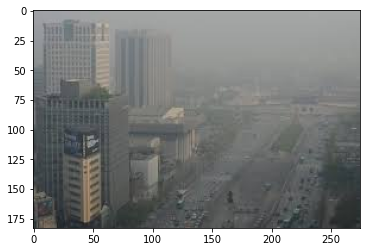

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('./data/city.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

#### 이전과 같이 먼저 히스토그램을 구한다. 아래의 값은 정규화된 히스토그램이다.

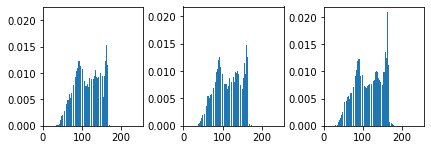

In [2]:
b_hist = np.zeros((256,1))
g_hist = np.zeros((256,1))
r_hist = np.zeros((256,1))
img_flat = np.reshape(img.copy(),(-1,3))

leng=len(img_flat)
for i in range(leng):
    b_hist[img_flat[i,0]]+=1
    g_hist[img_flat[i,1]]+=1
    r_hist[img_flat[i,2]]+=1
fig = plt.figure()
plt.subplot(231)
plt.bar(np.arange(256),b_hist.squeeze()/leng)
plt.xlim([0,256])
plt.subplot(232)
plt.bar(np.arange(256),g_hist.squeeze()/leng)
plt.xlim([0,256])
plt.subplot(233)
plt.bar(np.arange(256),r_hist.squeeze()/leng)
plt.xlim([0,256])
fig.tight_layout()
plt.show()

#### 누적 히스토그램은 다음과 같이 순서대로 이전의 값을 더하면 된다.

In [3]:
for i in range(1,256):
    b_hist[i]+=b_hist[i-1]
    g_hist[i]+=g_hist[i-1]
    r_hist[i]+=r_hist[i-1]

# 정규화한 값은 저장이 안되어 있으므로 다시 leng으로 나눠 정규화
b_hist= np.uint8(b_hist*255/leng+0.5)
g_hist= np.uint8(g_hist*255/leng+0.5)
r_hist= np.uint8(r_hist*255/leng+0.5)

#### 이제 이미지의 값을 평활화된 히스토그램으로 매핑을 해주면 완성이다.

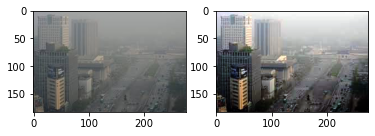

In [4]:
new = np.zeros_like(img)

for y in range(len(new)):
    for x in range(len(new[0])):
        new[y,x,0] = b_hist[img[y,x,0]]
        new[y,x,1] = g_hist[img[y,x,1]]
        new[y,x,2] = r_hist[img[y,x,2]]
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(new,cv2.COLOR_BGR2RGB))
plt.show()

#### 평활화 된 이미지의 histogram을 보면 다음과 같다.

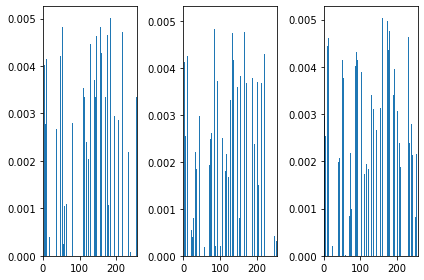

In [5]:
b_hist_n = np.zeros((256,1),np.uint8)
g_hist_n = np.zeros((256,1),np.uint8)
r_hist_n = np.zeros((256,1),np.uint8)

img_flat_n = np.reshape(new.copy(),(-1,3))

for i in range(leng):
    b_hist_n[img_flat_n[i,0]]+=1
    g_hist_n[img_flat_n[i,1]]+=1
    r_hist_n[img_flat_n[i,2]]+=1

fig=plt.figure()
plt.subplot(131)
plt.bar(np.arange(256),b_hist_n.squeeze()/leng)
plt.xlim([0,256])
plt.subplot(132)
plt.bar(np.arange(256),g_hist_n.squeeze()/leng)
plt.xlim([0,256])
plt.subplot(133)
plt.bar(np.arange(256),r_hist_n.squeeze()/leng)
plt.xlim([0,256])
fig.tight_layout()
plt.show()

#### 확실히 이전보다 분포가 더 고르게 되어있는 것을 확인할 수 있다.

#### 이 긴 과정이 Opencv에서는 cv2.equalizeHist 함수 하나면 끝이다.

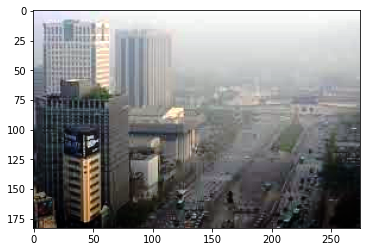

In [6]:
cv_new_b = np.expand_dims(cv2.equalizeHist(img[...,0]),-1)
cv_new_g = np.expand_dims(cv2.equalizeHist(img[...,1]),-1)
cv_new_r = np.expand_dims(cv2.equalizeHist(img[...,2]),-1)
cv_new = np.concatenate([cv_new_b,cv_new_g,cv_new_r],-1)
plt.imshow(cv2.cvtColor(cv_new,cv2.COLOR_BGR2RGB))